<a href="https://colab.research.google.com/github/jeffin95/TCS-iON-RIO-125-Forecasting-System/blob/main/retail_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Importing libraries*

In [ ]:
import pandas as pd
!pip install --upgrade xlrd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import itertools

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima
from pmdarima import auto_arima
import pmdarima as pm

from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tools.eval_measures import rmse

import warnings       
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

!pip install Prophet
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

from google.colab import drive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# *Importing Dataset*

In [ ]:
drive.mount('/content/drive')
Path = 'drive/My Drive/Internship'
Data = pd.read_excel(Path+'/Superstore.xls')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Data.shape

(9994, 21)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9983 non-null   float64       
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
Data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2015-110422,2015-01-21,2015-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


# **EDA**

**Best Selling and Most Profitable**

In [ ]:
category_analysis = pd.DataFrame(Data.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
category_sales = pd.DataFrame(category_analysis.sort_values('Sales', ascending = False))
category_sales

,Sales,Profit,Quantity
Category,,,
Technology,836154.0330,145454.9481,6939
Furniture,741999.7953,18451.2728,8028
Office Supplies,719047.0320,122490.8008,22906


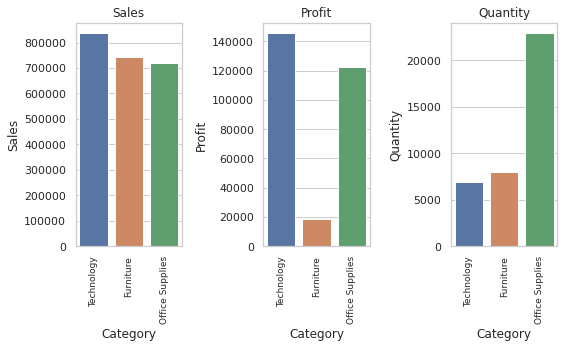

In [ ]:
# Set for grouped plots - figure with a 2x2 grid of Axes
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))
# Plot barplots
cat1 = sns.barplot(x = category_sales.index, y = category_sales.Sales, ax=axis[0])
cat2 = sns.barplot(x = category_sales.index, y = category_sales.Profit, ax=axis[1])
cat3 = sns.barplot(x = category_sales.index, y = category_sales.Quantity, ax=axis[2])
# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)
# Set spacing between subplots
figure.tight_layout()

**Best selling and Most profitable in Sub-catagory**

In [ ]:
subcat_analysis = pd.DataFrame(Data.groupby(['Sub-Category'])[['Sales', 'Profit','Quantity']].sum())
subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
subcat_sales

,Sales,Profit,Quantity
Sub-Category,,,
Phones,330007.0540,44515.7306,3289
Chairs,328449.1030,26590.1663,2356
Storage,223843.6080,21278.8264,3158
Tables,206965.5320,-17725.4811,1241
Binders,203412.7330,30221.7633,5974
Machines,189238.6310,3384.7569,440
Accessories,167380.3180,41936.6357,2976
Copiers,149528.0300,55617.8249,234
Bookcases,114879.9963,-3472.5560,868


In [ ]:
subcat_profit = pd.DataFrame(subcat_analysis.sort_values('Profit', ascending = False))
subcat_profit

,Sales,Profit,Quantity
Sub-Category,,,
Copiers,149528.0300,55617.8249,234
Phones,330007.0540,44515.7306,3289
Accessories,167380.3180,41936.6357,2976
Paper,78479.2060,34053.5693,5178
Binders,203412.7330,30221.7633,5974
Chairs,328449.1030,26590.1663,2356
Storage,223843.6080,21278.8264,3158
Appliances,107532.1610,18138.0054,1729
Furnishings,91705.1640,13059.1436,3563


In [ ]:
subcat_quantity = pd.DataFrame(subcat_analysis.sort_values('Quantity', ascending = False))
subcat_quantity

,Sales,Profit,Quantity
Sub-Category,,,
Binders,203412.7330,30221.7633,5974
Paper,78479.2060,34053.5693,5178
Furnishings,91705.1640,13059.1436,3563
Phones,330007.0540,44515.7306,3289
Storage,223843.6080,21278.8264,3158
Art,27118.7920,6527.7870,3000
Accessories,167380.3180,41936.6357,2976
Chairs,328449.1030,26590.1663,2356
Appliances,107532.1610,18138.0054,1729


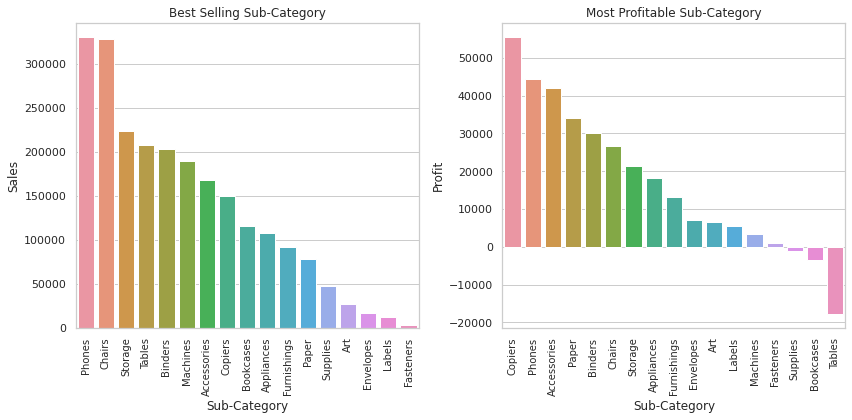

In [ ]:
# Plot Bar Plots
sns.set_theme(style="whitegrid")
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))
# Plot Bar Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data = subcat_sales, x = subcat_sales.index, y = subcat_sales.Sales, ax=axis[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)
# Plot Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.Profit, ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)
# Set spacing between subplots
figure.tight_layout()
plt.show()

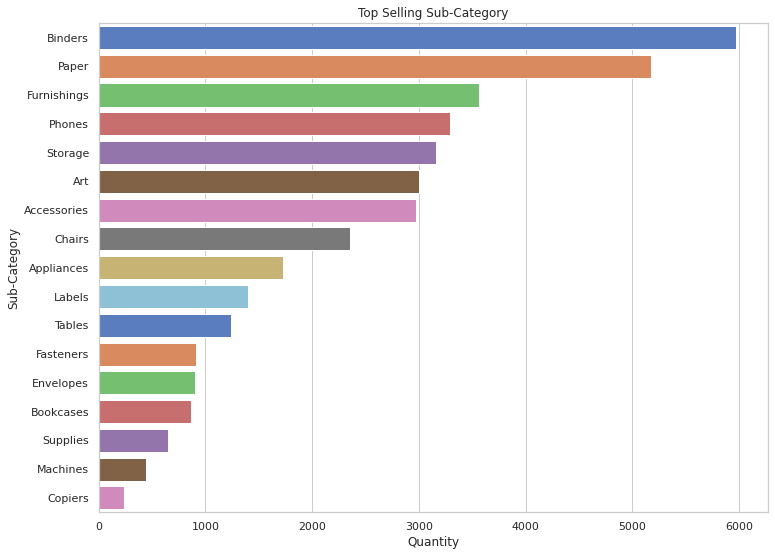

In [ ]:
# Plot Bar Plot for Top Selling Sub-Category
sns.set_theme(style="whitegrid")
sns.barplot(data = subcat_quantity, y = subcat_quantity.index, x = subcat_quantity.Quantity, palette = "muted")
plt.title("Top Selling Sub-Category")
plt.show()

In [ ]:
segment_analysis = pd.DataFrame(Data.groupby(['Segment'])[['Profit']].sum())
segment_analysis

,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


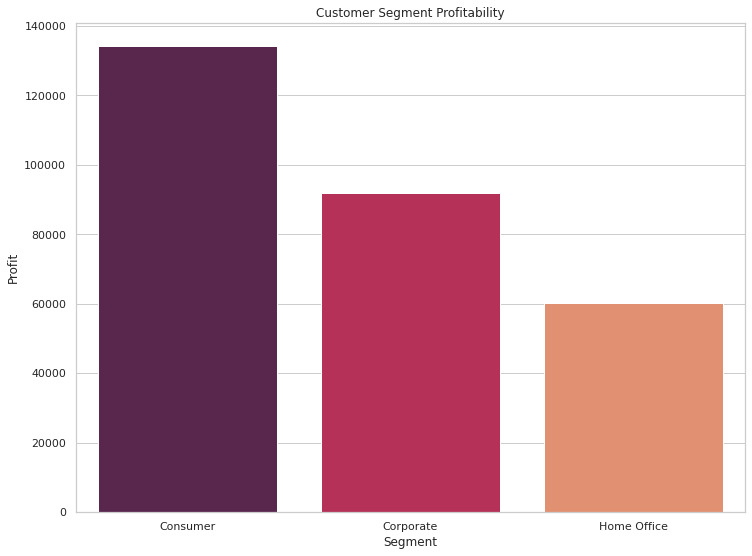

In [ ]:
# Plot Bar Plot
sns.set_theme(style="whitegrid")
sns.barplot(data = segment_analysis, x = segment_analysis.index, y = segment_analysis.Profit, palette = "rocket")
plt.title("Customer Segment Profitability")
plt.show()

**Most preferred Shipment mode**

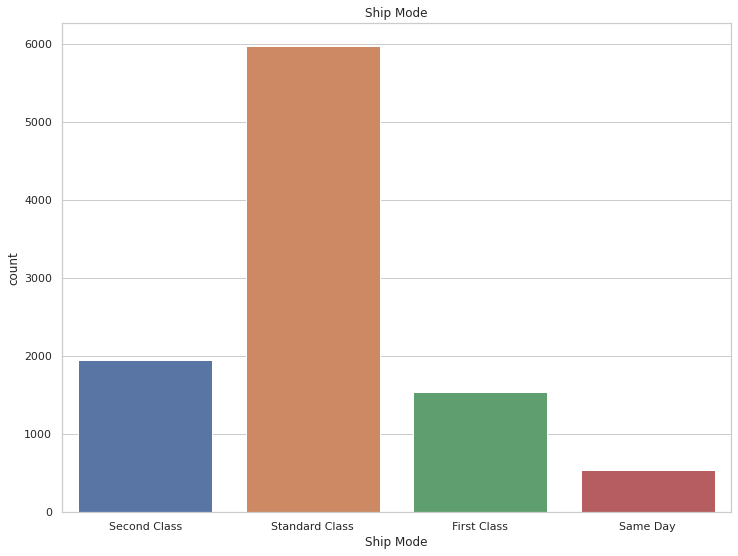

In [ ]:
# Plot shipment mode
sns.set_theme(style="whitegrid")
sns.countplot(Data['Ship Mode'])
plt.title("Ship Mode")
plt.show()

**Most profitable Region**

In [ ]:
region_analysis = pd.DataFrame(Data.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis

,Region,Profit
0,Central,39706.3625
1,East,91522.7800
2,South,46749.4303
3,West,108418.4489


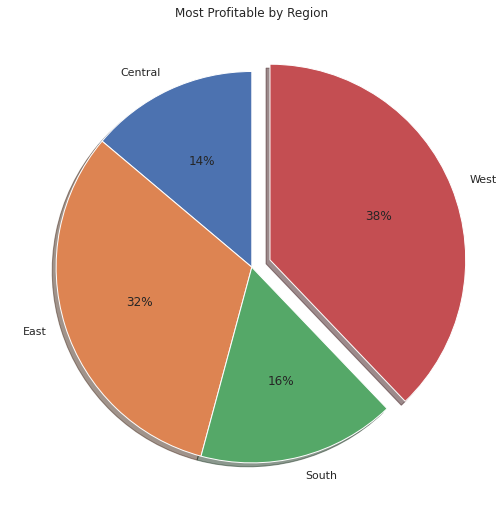

In [ ]:
# Plot Pie Chart
explode = [0, 0, 0, 0.1]
plt.pie(region_analysis.Profit, labels = region_analysis.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)
plt.title("Most Profitable by Region")
plt.show()

**City which has Highest number of Sales**

In [ ]:
city_sales = pd.DataFrame(Data.groupby(['City'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending = False))
top10 = city_sales[:10]
top10

,Sales,Quantity
City,,
New York City,255854.4310,3408
Los Angeles,175851.3410,2879
Seattle,119540.7420,1590
San Francisco,112669.0920,1935
Philadelphia,108629.3170,1979
Houston,64504.7604,1466
Chicago,48539.5410,1132
San Diego,47521.0290,670
Jacksonville,44713.1830,429


City which has Least number of Sales

In [ ]:
bottom10 = city_sales[-10:]
bottom10

,Sales,Quantity
City,,
Missouri City,6.370,7
Keller,6.000,2
Layton,4.960,4
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


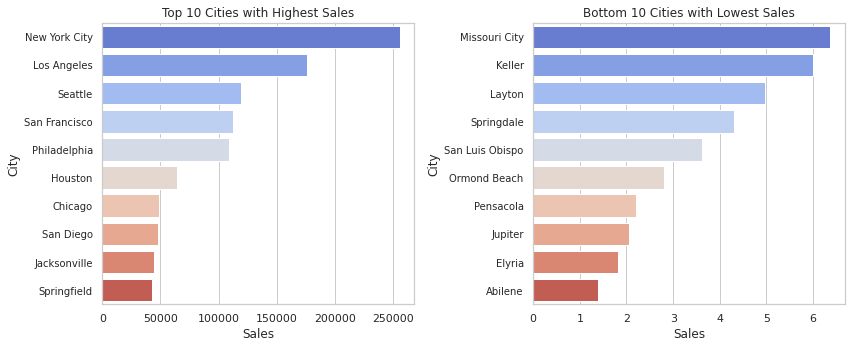

In [ ]:
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme(style="whitegrid")
top10c = sns.barplot(data = top10, y = top10.index, x = top10.Sales, palette = "coolwarm", ax = axis[0])
top10c.set(Title = "Top 10 Cities with Highest Sales")
top10c.set_yticklabels(top10c.get_yticklabels(),size = 10)
# Plot Bar Plot for Best Selling Sub-Category
bottom10c = sns.barplot(data = bottom10, y = bottom10.index, x = bottom10.Sales, palette = "coolwarm", ax=axis[1])
bottom10c.set(Title = "Bottom 10 Cities with Lowest Sales")
bottom10c.set_yticklabels(bottom10c.get_yticklabels(),size = 10)
# Set spacing between subplots
figure.tight_layout()
plt.show()

# *Preprocessing*

In [ ]:
#checking the duplicate rows
Data.duplicated().sum()

0

In [ ]:
Data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [ ]:
Data[Data['Postal Code'].isnull()== True]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2234,2235,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.0,67.6599
5274,5275,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,...,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000
8798,8799,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,...,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350
9146,9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914
9147,9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336
9148,9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0.0,406.7154
9386,9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0.0,37.5624
9387,9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0.0,5.7716
9388,9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0.0,152.0232
9389,9390,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,0.0,0.9588


In [ ]:
Data['Postal Code'].fillna('05401', inplace = True)

In [ ]:
Data.describe(include = 'all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.0,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1236,1334,4,793,793,3,1,531,...,631.0,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2018-100111,2017-09-05 00:00:00,2016-12-16 00:00:00,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,10035.0,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,912,...,263.0,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
first,NaN,NaN,2015-01-03 00:00:00,2015-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2018-12-30 00:00:00,2019-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750


In [ ]:
Data['Order Date']= pd.to_datetime(Data['Order Date'])
Data = Data.set_index(['Order Date'])

In [ ]:
Data.index.min(), Data.index.max()

(Timestamp('2015-01-03 00:00:00'), Timestamp('2018-12-30 00:00:00'))

In [ ]:
Data['Profit Margin %'] = (Data.Profit / Data.Sales) * 100
Data.head(5)

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin %
Order Date,,,,,,,,,,,,,,,,,,,,,
2017-11-08,1,CA-2017-152156,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.00
2017-11-08,2,CA-2017-152156,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.00
2017-06-12,3,CA-2017-138688,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.00
2016-10-11,4,US-2016-108966,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.00
2016-10-11,5,US-2016-108966,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25


In [ ]:
Data.drop(["Row ID","Customer ID","Customer Name","Postal Code","Ship Date","Ship Mode"],axis=1,inplace= True)

In [ ]:
Data.head(2)

,Order ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin %
Order Date,,,,,,,,,,,,,,,
2017-11-08,CA-2017-152156,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,16.0
2017-11-08,CA-2017-152156,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,30.0


In [ ]:
Data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
{column: len(Data[column].unique()) for column in Data.columns}

{'Order ID': 5009,
 'Segment': 3,
 'Country': 1,
 'City': 531,
 'State': 49,
 'Region': 4,
 'Product ID': 1862,
 'Category': 3,
 'Sub-Category': 17,
 'Product Name': 1850,
 'Sales': 6144,
 'Quantity': 14,
 'Discount': 12,
 'Profit': 7545,
 'Profit Margin %': 1152}

In [ ]:
Data= Data.copy()
Data.drop(['Country','Product Name','Order ID','Segment','City','State','Region','Product ID','Sub-Category','Quantity','Discount',
           'Profit'],axis=1, inplace=True)

In [ ]:
Data.head()

,Category,Sales,Profit Margin %
Order Date,,,
2017-11-08,Furniture,261.9600,16.00
2017-11-08,Furniture,731.9400,30.00
2017-06-12,Office Supplies,14.6200,47.00
2016-10-11,Furniture,957.5775,-40.00
2016-10-11,Office Supplies,22.3680,11.25


In [ ]:
#Creating DataFrames for FURNITURE, OFFICE SUPPLY, TECHNOLOGY.
furniture_data = Data.loc[Data['Category'] == 'Furniture']
office_supplies_data = Data.loc[Data['Category'] == 'Office Supplies']
technology_data = Data.loc[Data['Category'] == 'Technology']

In [ ]:
furniture_mean = furniture_data['Sales'].resample('MS').mean()
office_mean = office_supplies_data['Sales'].resample('MS').mean()
technology_mean = technology_data['Sales'].resample('MS').mean()

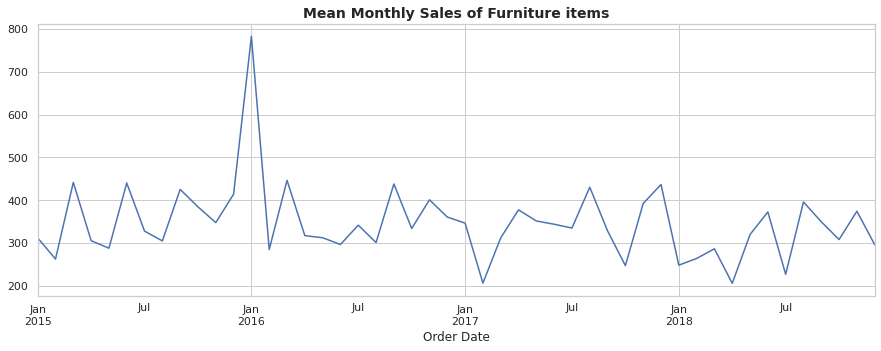

In [ ]:
furniture_mean.plot(figsize = (15,5))
plt.title('Mean Monthly Sales of Furniture items', fontsize=14, fontweight='bold')
plt.show()

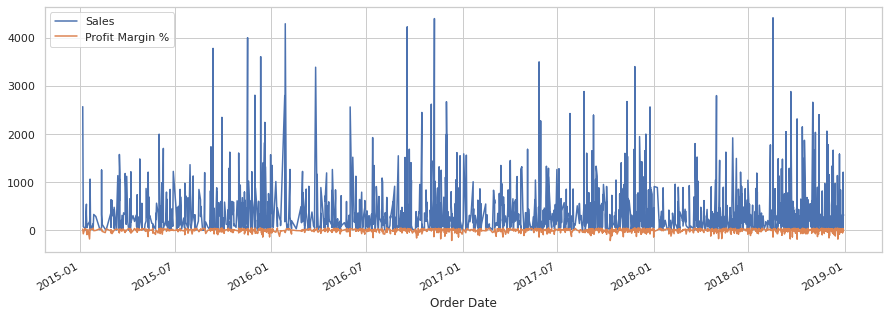

In [ ]:
furniture_data.plot(figsize=(15,5))
plt.show()

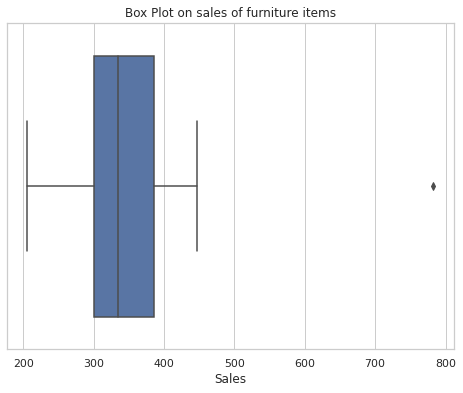

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(furniture_mean).set_title('Box Plot on sales of furniture items')
plt.show()

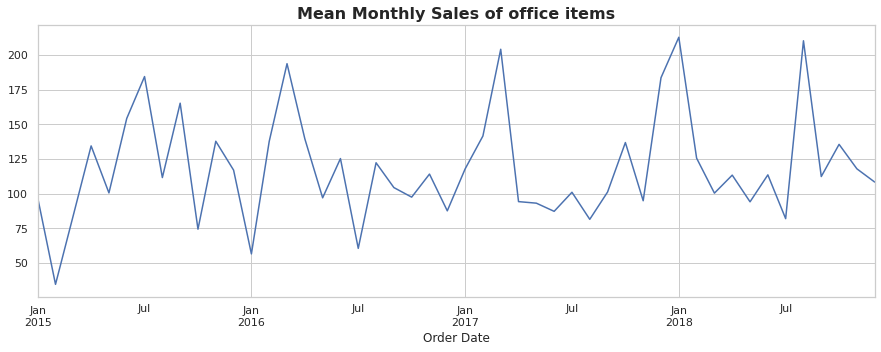

In [ ]:
office_mean.plot(figsize = (15,5))
plt.title('Mean Monthly Sales of office items', fontsize=16, fontweight='bold')
plt.show()

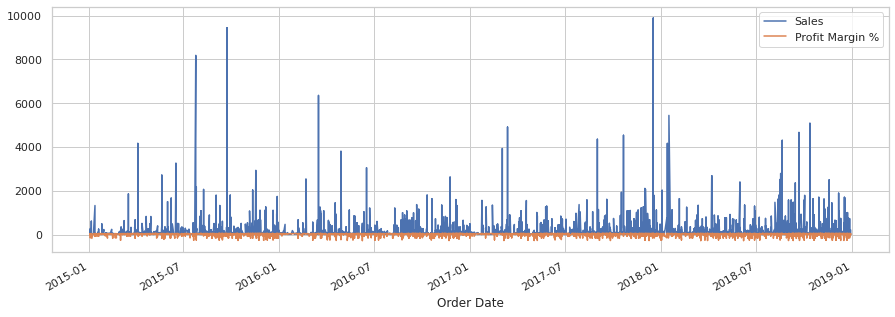

In [ ]:
office_supplies_data.plot(figsize=(15,5))
plt.show()

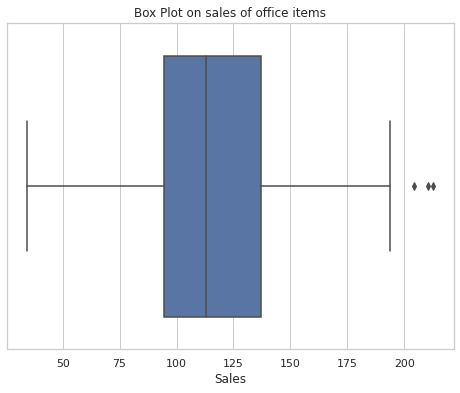

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(office_mean).set_title('Box Plot on sales of office items')
plt.show()

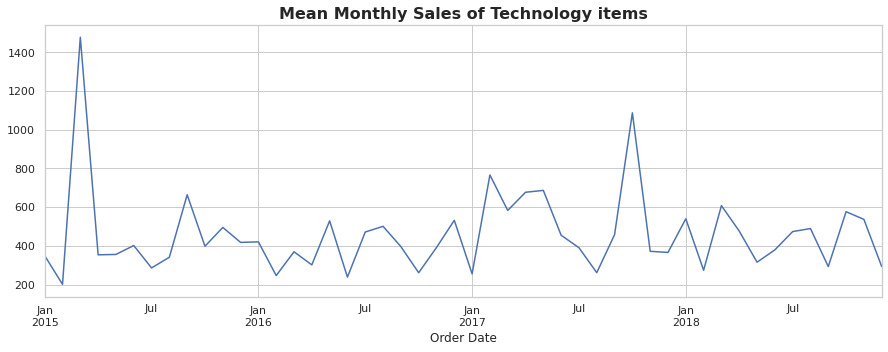

In [ ]:
technology_mean.plot(figsize = (15,5))
plt.title('Mean Monthly Sales of Technology items', fontsize=16, fontweight='bold')
plt.show()

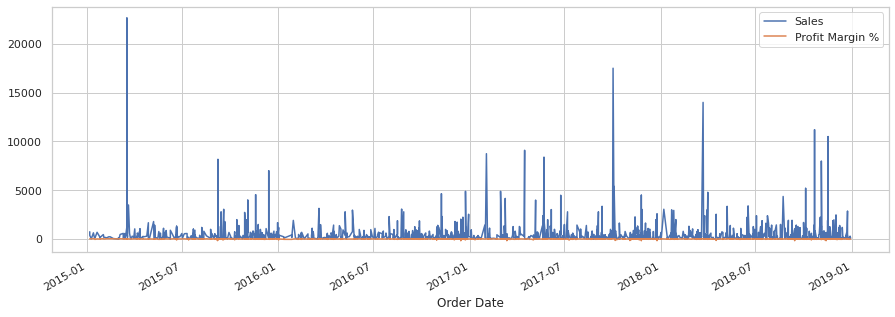

In [ ]:
technology_data.plot(figsize=(15,5))
plt.show()

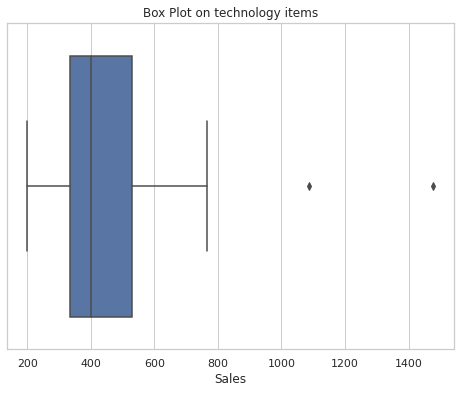

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(technology_mean).set_title('Box Plot on technology items')
plt.show()

Seasonal Decomposition of each Catagory

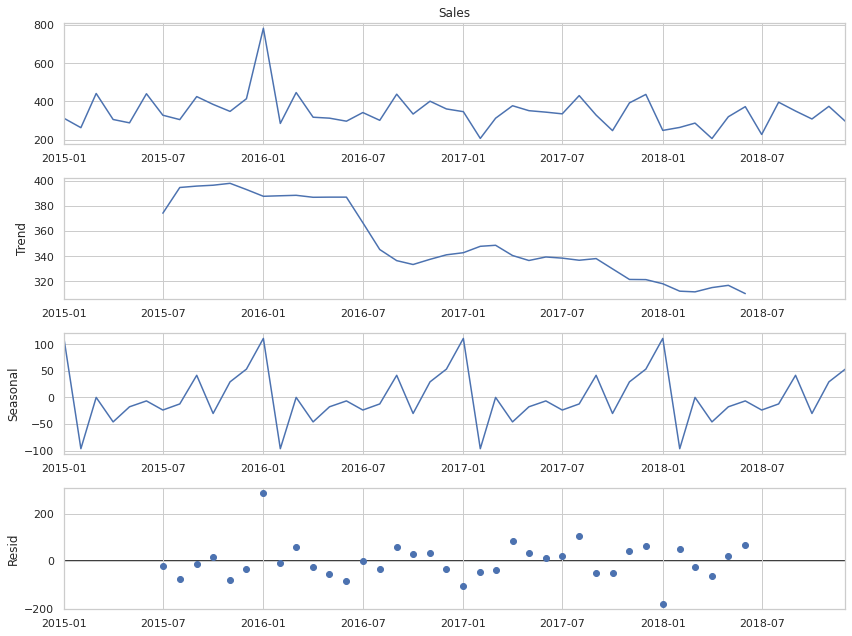

In [ ]:
rcParams['figure.figsize'] = 12, 9
decomposition = sm.tsa.seasonal_decompose(furniture_mean, model='additive')
fig = decomposition.plot()
plt.show()

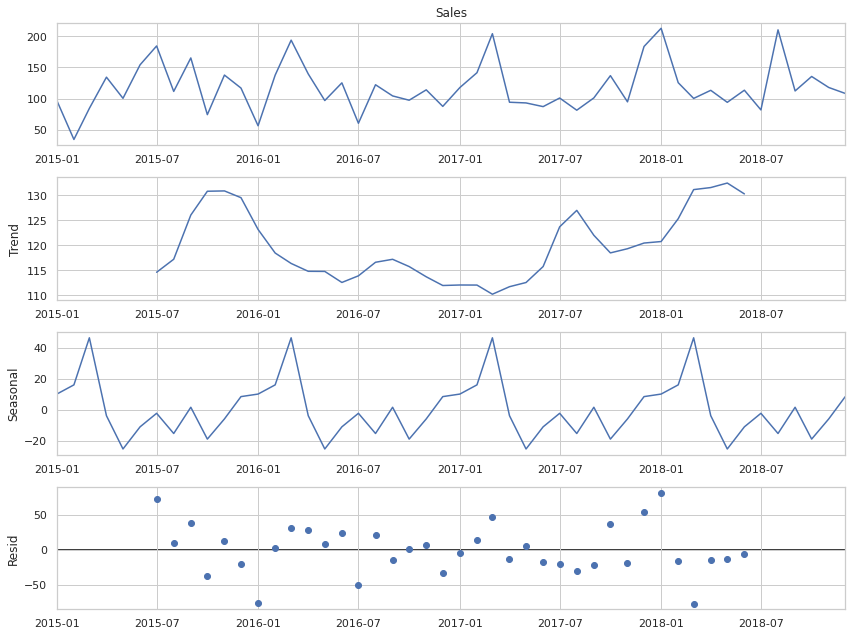

In [ ]:
rcParams['figure.figsize'] = 12, 9
decomposition = sm.tsa.seasonal_decompose(office_mean, model='additive')
fig = decomposition.plot()
plt.show()

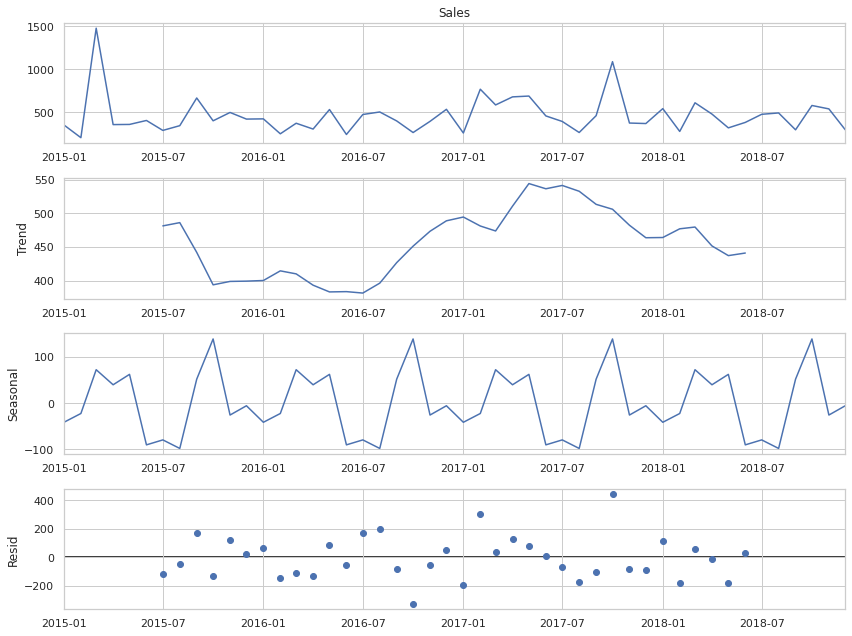

In [ ]:
rcParams['figure.figsize'] = 12, 9
decomposition = sm.tsa.seasonal_decompose(technology_mean, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
def adfuller_test(series):
    result = adfuller(series)
    labels = ['ADF test statistic', 'p-value', '#lags used', 'Number of observations used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
        
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
print("Test of Furniture")
adfuller_test(furniture_mean)
print("\nTest of Office Items")
adfuller_test(office_mean)
print("\nTest of Technology")
adfuller_test(technology_mean)

Test of Furniture
ADF test statistic : -6.962405221214861
p-value : 9.093398510006677e-10
#lags used : 0
Number of observations used : 47
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary

Test of Office Items
ADF test statistic : -6.100365254423857
p-value : 9.869101392257422e-08
#lags used : 0
Number of observations used : 47
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary

Test of Technology
ADF test statistic : -7.8725670697716446
p-value : 4.94020681035215e-12
#lags used : 0
Number of observations used : 47
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


## Auto-Correlation Plots

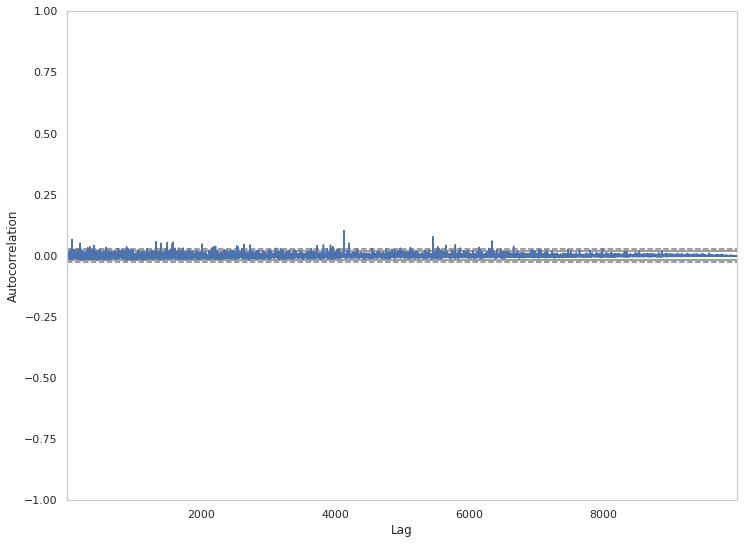

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(Data['Sales'])
plt.show()

Autocorrelation and Partial Autocorrelation

Identification of an AR model is often best done with the PACF.

> For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

Identification of an MA model is often best done with the ACF rather than the PACF.


> For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q p AR model lags d differencing q MA lags

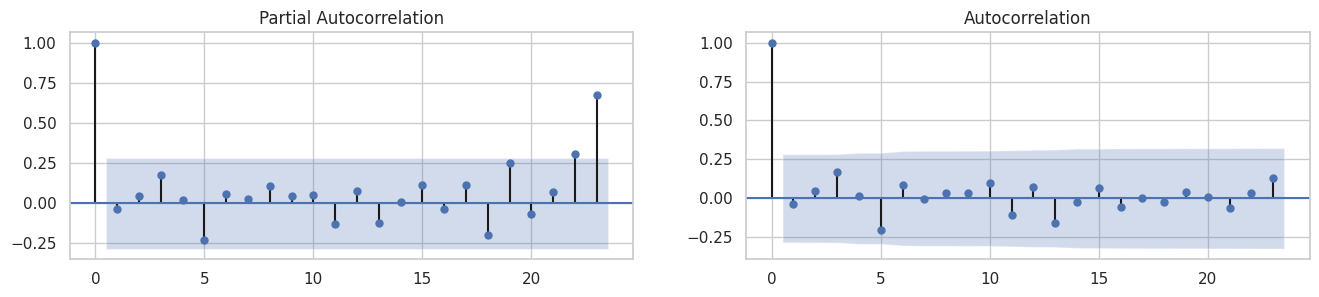

In [ ]:
#Furniture
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
sm.graphics.tsa.plot_pacf(furniture_mean,lags=23,method="ols",ax=axes[0])
sm.graphics.tsa.plot_acf(furniture_mean, lags=23,ax=axes[1])
plt.show()

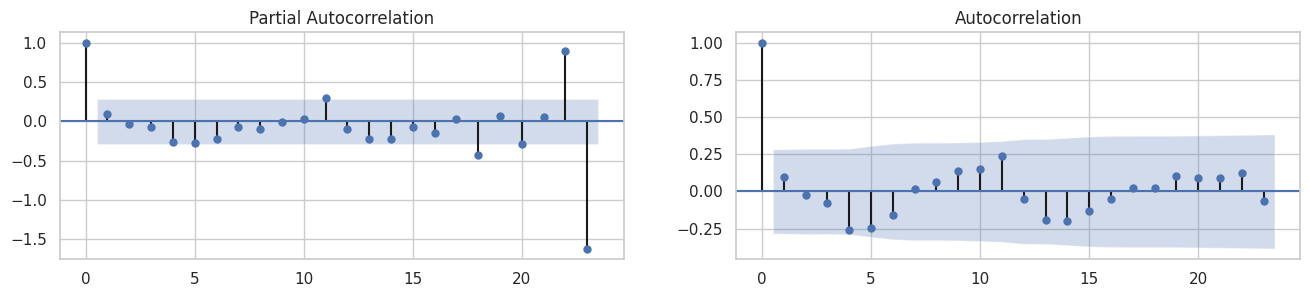

In [ ]:
#Office items
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
sm.graphics.tsa.plot_pacf(office_mean,lags=23,method="ols",ax=axes[0])
sm.graphics.tsa.plot_acf(office_mean, lags=23,ax=axes[1])
plt.show()

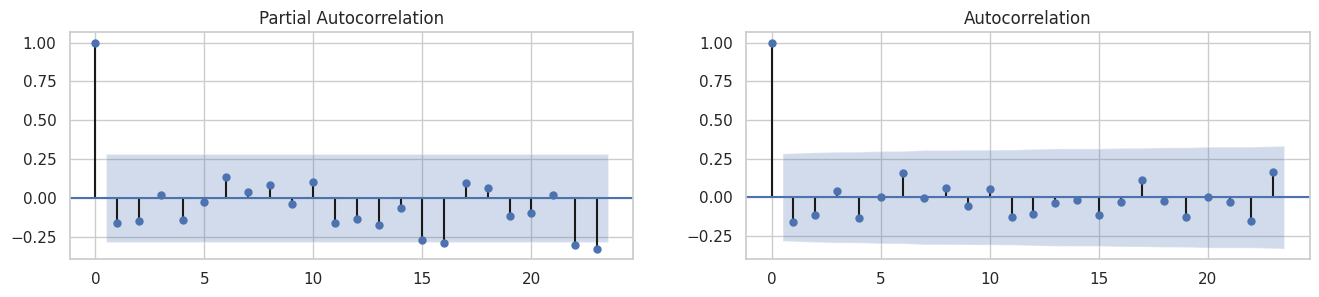

In [ ]:
#Technology
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
sm.graphics.tsa.plot_pacf(technology_mean,lags=23,method="ols",ax=axes[0])
sm.graphics.tsa.plot_acf(technology_mean, lags=23,ax=axes[1])
plt.show()

# Parameters of the ARIMA model are defined by

AR(p)-lag order
I(d) -degree of difference
MA(q) - order of moving average
SARIMAX an extension of ARIMA supports time series data with a seasonal component. it is denoted by order (p,d,q)(P,D,Q)m.

P - Seasonal regression,
D - differencing,
Q - moving average coefficients,
m - no.of datapoints in each seasonal cycle

*   Furniture



In [ ]:
train_furniture = furniture_mean.loc['2015-01-03':'2016-12-30']
test_furniture = furniture_mean.loc['2017-01-01':]

In [ ]:
model = pm.auto_arima(train_furniture, start_p=1, start_q=1,
                      test='adf',        # use adftest to find optimal 'd'
                      max_p=3, max_q=3,  # maximum p and q
                      m=12,              # frequency of series
                      d=None,            # let model determine 'd'
                      seasonal=True,     # Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary().tables[1])
model.fit(train_furniture)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=290.171, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=288.188, Time=0.04 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=284.906, Time=0.33 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=286.906, Time=0.75 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=286.906, Time=0.97 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,1,0)(1,0,0)[12]             : AIC=282.907, Time=0.14 sec
 ARIMA(0,1,0)(2,0,0)[12]             : AIC=284.907, Time=0.59 sec
 ARIMA(0,1,0)(1,0,1)[12]             : AIC=284.907, Time=0.31

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

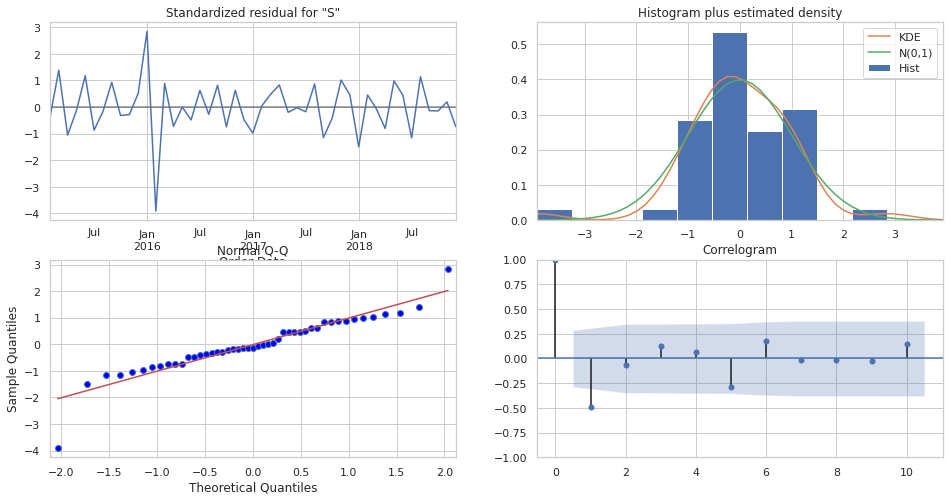

In [ ]:
model_furniture = SARIMAX(furniture_mean,order=(0,1,0),seasonal_order=(1,0,0,12),enforce_invertibility=False)
result_furniture = model_furniture.fit()

result_furniture.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
initial = len(train_furniture)
final = len(train_furniture) + len(test_furniture) - 1
prediction_furniture = result_furniture.predict(initial,final).rename('SARIMA model')
prediction_furniture

Order Date
2016-12-01    420.304818
2017-01-01    467.722113
2017-02-01    201.969929
2017-03-01    253.494784
2017-04-01    274.772325
2017-05-01    376.051853
2017-06-01    347.036610
2017-07-01    357.075504
2017-08-01    323.285751
2017-09-01    470.142164
2017-10-01    298.325824
2017-11-01    266.792834
2017-12-01    380.679102
2018-01-01    432.520227
2018-02-01    207.885528
2018-03-01    294.756032
2018-04-01    305.620455
2018-05-01    198.534542
2018-06-01    317.729284
2018-07-01    370.141248
2018-08-01    254.864084
2018-09-01    366.332195
2018-10-01    326.182439
2018-11-01    350.341761
Freq: MS, Name: SARIMA model, dtype: float64

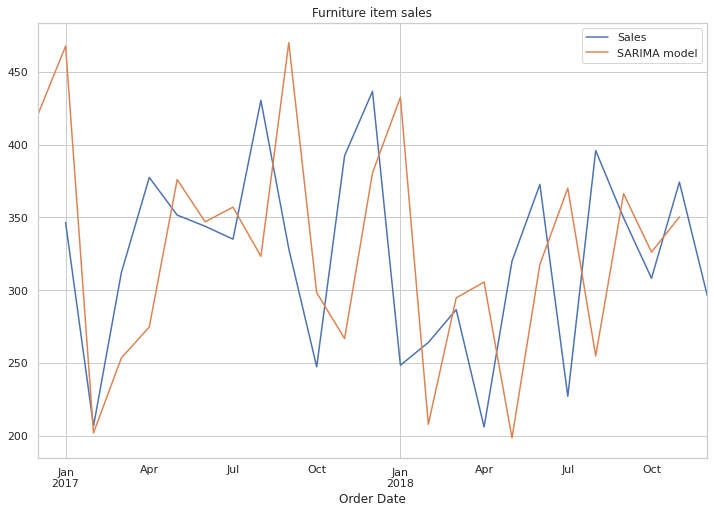

In [ ]:
test_furniture.plot(figsize=(12,8),legend=True)
prediction_furniture.plot(legend=True)
plt.title("Furniture item sales")
plt.show()

In [ ]:
mean_squared_error(test_furniture,prediction_furniture)

13247.09082648762

In [ ]:
rmse(test_furniture,prediction_furniture)

115.0960069962795

In [ ]:
test_furniture.mean()

323.2692267840419

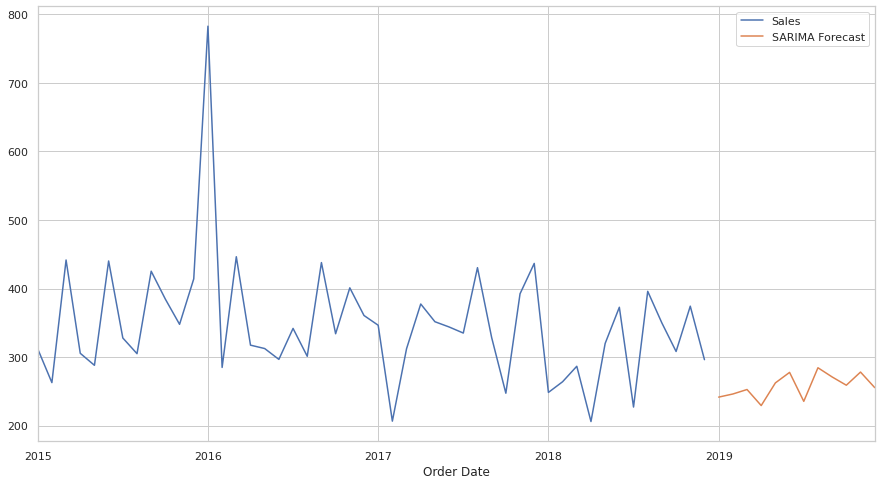

In [ ]:
model_furniture_ = SARIMAX(furniture_mean,order=(0,1, 0),seasonal_order=(1, 0, 0, 12),enforce_invertibility=False)
result_furniture_final = model_furniture_.fit()
forecast_furniture = result_furniture_final.predict(len(furniture_mean),len(furniture_mean)+11,typ='levels').rename('SARIMA Forecast')
furniture_mean.plot(legend=True,figsize=(15,8))
forecast_furniture.plot(legend=True)
plt.show()

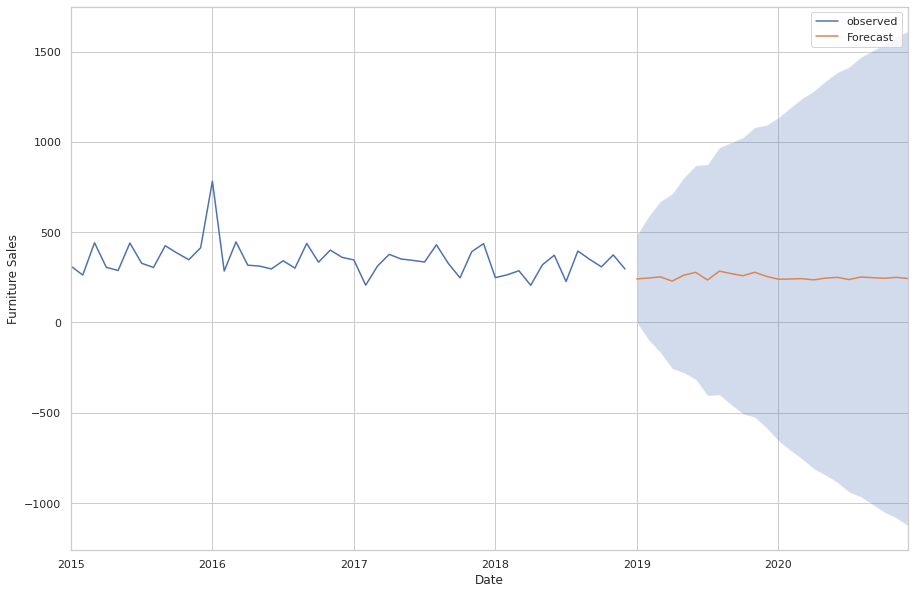

In [ ]:
pred_furniture = result_furniture_final.get_forecast(steps=24)
pred_ci_furniture = pred_furniture.conf_int()
ax = furniture_mean.plot(label='observed',figsize=(15,10))
pred_furniture.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_ci_furniture.index,
               pred_ci_furniture.iloc[:,0],
               pred_ci_furniture.iloc[:,1],alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

With lowest AIC score

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
simple_pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))]

print('Parameter combinations for Seasonal ARIMA...')

for param in simple_pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(furniture_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)


            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Parameter combinations for Seasonal ARIMA...
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:688.3112416991725
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1523.2974517428456
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:426.2046489859171
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:272.09198476282904
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:452.8238602501691
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1432.2342814316362
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:295.44645647223496
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:274.09198456327755
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:641.1240680666233
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2688.8323841976394
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:416.549645336461
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:262.52305170476995
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:455.14321208662795
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2486.2702873719536
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:297.446406625019
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:264.52300131281385
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:580.638926970597
ARIMA(0, 1, 0

The (p,d,q)(P,D,Q,m) order (0, 1, 1)(0, 1, 1, 12) have lower AIC value of 251.24.

In [ ]:
#fitting model
best_model = SARIMAX(furniture_mean, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12)).fit()
print(best_model.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9982     13.522     -0.074      0.941     -27.502      25.505
ma.S.L12      -0.9855     13.786     -0.071      0.943     -28.005      26.034
sigma2      7620.1329   1.68e+05      0.045      0.964   -3.22e+05    3.37e+05


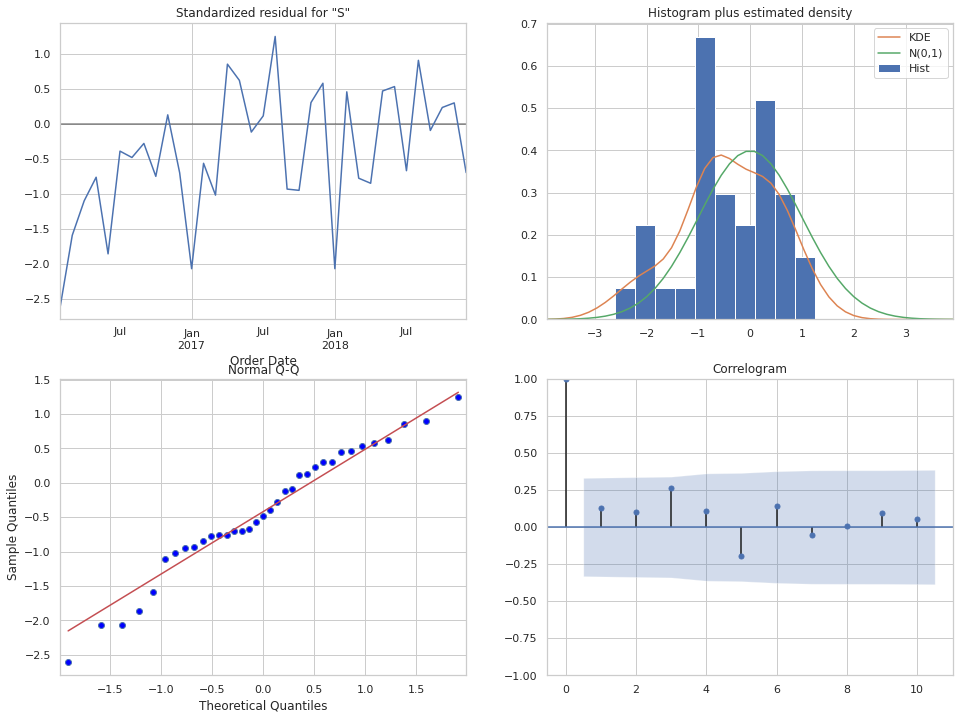

In [ ]:
best_model.plot_diagnostics(figsize=(16, 12))
plt.show()

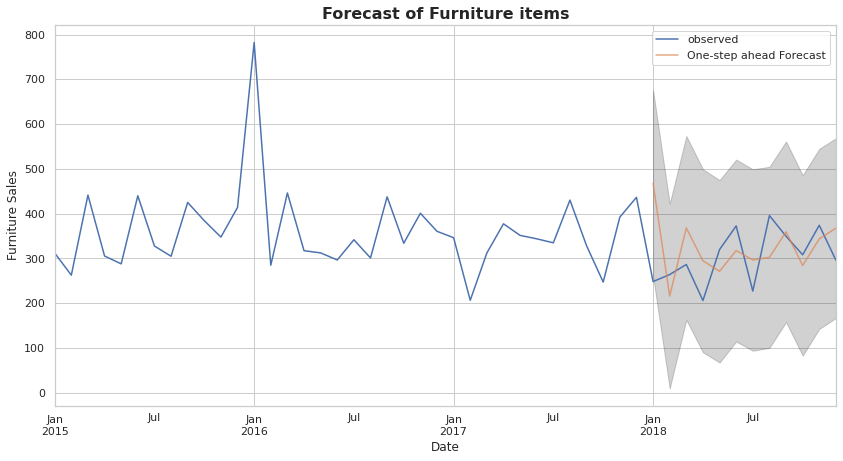

In [ ]:
pred = best_model.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = furniture_mean['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.title('Forecast of Furniture items', fontsize=16, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = furniture_mean['2018-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 7554.82
The Root Mean Squared Error of our forecasts is 86.92


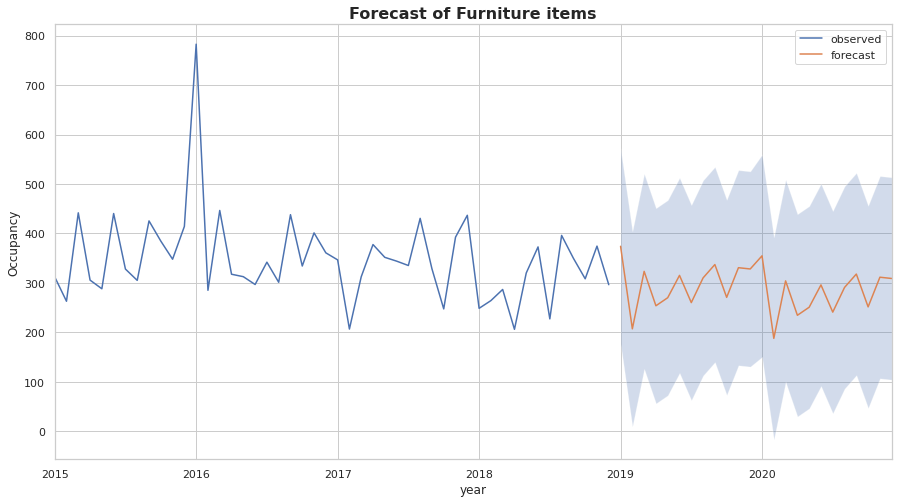

In [ ]:
# Get forecast 24 steps ahead in future
pred = best_model.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred.conf_int()

ax = furniture_mean.plot(label='observed', figsize=(15, 8))

pred.predicted_mean.plot(ax=ax, label='forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], alpha=0.25)
plt.title('Forecast of Furniture items', fontsize=16, fontweight='bold')
ax.set_xlabel('year')
ax.set_ylabel('Occupancy')

plt.legend()
plt.show()


*   Office Supplies

In [ ]:
train_office = office_mean.loc['2015-01-03':'2016-12-30']
test_office = office_mean.loc['2017-01-01':]

In [ ]:
model = pm.auto_arima(train_office, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   #  Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary().tables[1])

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,1)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=250.166, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=243.270, Time=0.09 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=inf, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=241.314, Time=0.03 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=243.269, Time=0.08 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=245.269, Time=0.13 sec
 ARIMA(2,2,0)(0,0,0)[12]             : AIC=233.576, Time=0.05 sec
 ARIMA(2,2,0)(1,0,0)[12]             : AIC=234.977, Time=0.15 sec
 ARIMA(2,2,0)(0,0,1)[12]             : AIC=inf, Time=0.28 sec
 ARIMA(2,2,0)(1,0,1)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(3,2,0)(0,0,0)[12]             : AIC=234.686, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[12]             : AIC=231.531, Time=0.13 sec
 ARIMA(2,2,1)(1,0,0)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(2,2,1)(0,0,1)[12]             : AIC=inf, Time=

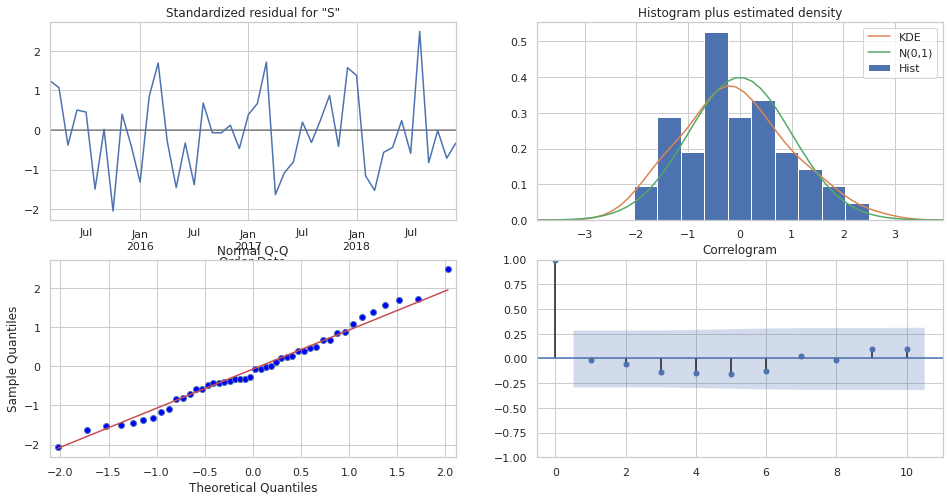

In [ ]:
model_office = SARIMAX(office_mean,order=(2,2,1),seasonal_order=(0,0,0,12),enforce_invertibility=False)
result_office = model_office.fit()
result_office.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
start = len(train_office)
end = len(train_office) + len(test_office) - 1
prediction_office = result_office.predict(start,end).rename('SARIMA model')
prediction_office

Order Date
2016-12-01    109.365852
2017-01-01     99.787364
2017-02-01    110.391604
2017-03-01    124.264918
2017-04-01    170.066843
2017-05-01    143.336955
2017-06-01    124.661338
2017-07-01     91.713589
2017-08-01     96.075383
2017-09-01     89.503017
2017-10-01     96.380431
2017-11-01    114.179061
2017-12-01    110.767233
2018-01-01    148.983762
2018-02-01    179.110001
2018-03-01    170.882876
2018-04-01    139.543074
2018-05-01    114.351567
2018-06-01    102.602023
2018-07-01    109.132642
2018-08-01     95.255049
2018-09-01    150.404655
2018-10-01    136.091573
2018-11-01    150.732988
Freq: MS, Name: SARIMA model, dtype: float64

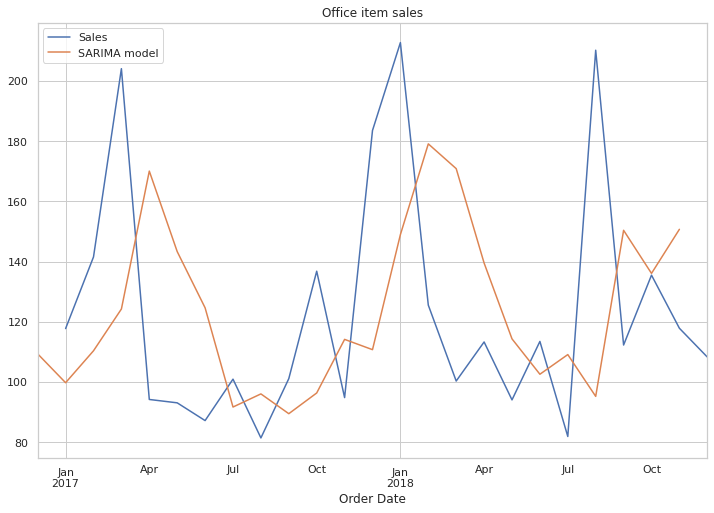

In [ ]:
test_office.plot(figsize=(12,8),legend=True)
prediction_office.plot(legend=True)
plt.title("Office item sales");

In [ ]:
mean_squared_error(test_office,prediction_office)

2672.230080153931

In [ ]:
rmse(test_office,prediction_office)

51.6936174024795

In [ ]:
test_office.mean()

123.43622631173484

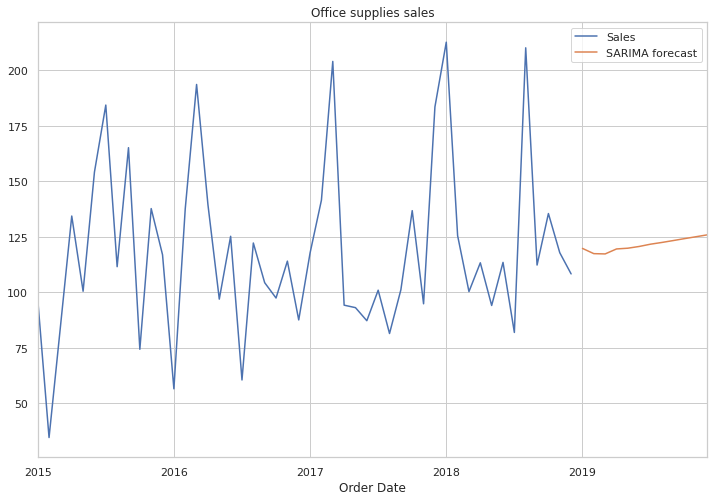

In [ ]:
model_office_final = SARIMAX(office_mean,order=(2, 2, 1),seasonal_order=(0, 0, 0, 12),enforce_invertibility=False)
result_office_final = model_office_final.fit()
forecast_office = result_office_final.predict(len(office_mean),len(office_mean)+11,typ='levels').rename('SARIMA forecast')
office_mean.plot(legend=True,figsize=(12,8))
forecast_office.plot(legend=True)
plt.title("Office supplies sales");

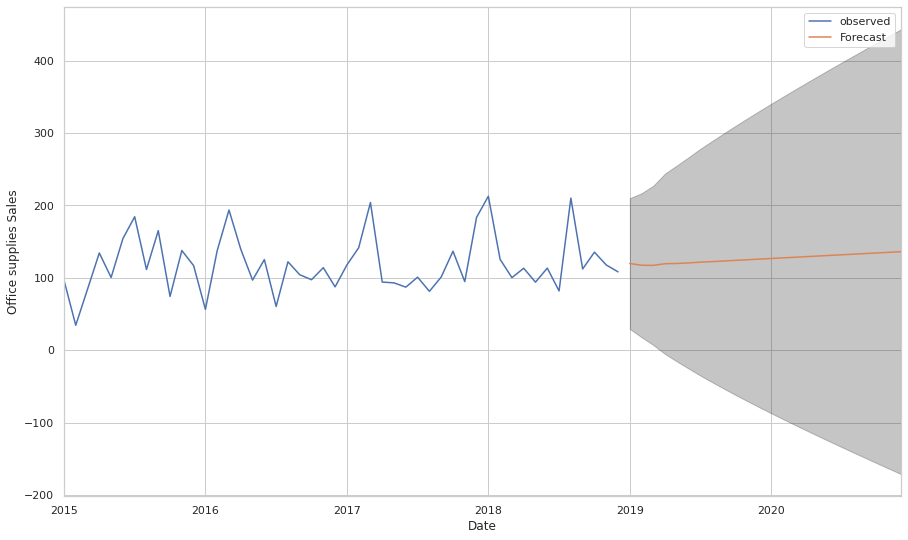

In [ ]:
pred_office = result_office_final.get_forecast(steps=24)
pred_ci_office = pred_office.conf_int()
ax = office_mean.plot(label='observed',figsize=(15,9))
pred_office.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_ci_office.index,
               pred_ci_office.iloc[:,0],
               pred_ci_office.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Office supplies Sales')
plt.legend()
plt.show()

with lowest AIC score

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
simple_pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))]

print('Parameter combinations for Seasonal ARIMA...')

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in simple_pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(office_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)


            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Parameter combinations for Seasonal ARIMA...
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:589.5002315061224
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1500.4827356287328
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:383.4175511140716
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:248.89284131163458
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:394.8386791980883
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1064.3108510825095
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:260.5044719309093
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:250.10262158199004
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:545.8315751699356
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2634.7746208689196
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:371.81948302766216
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:240.3985698863008
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:396.43734243158246
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2299.3001338221047
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:262.1735163819377
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:242.26144570279456
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:496.8049609774627
ARIMA(0, 1,

The (p,d,q)(P,D,Q,m) order (0, 1, 1)(0, 1, 1, 12) have lower AIC value of 231.55.

In [ ]:
#fitting model
best_model = SARIMAX(office_mean, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12)).fit()
print(best_model.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9991     23.370     -0.043      0.966     -46.804      44.806
ma.S.L12      -0.5111      0.541     -0.945      0.345      -1.571       0.549
sigma2      2636.3025   6.06e+04      0.044      0.965   -1.16e+05    1.21e+05


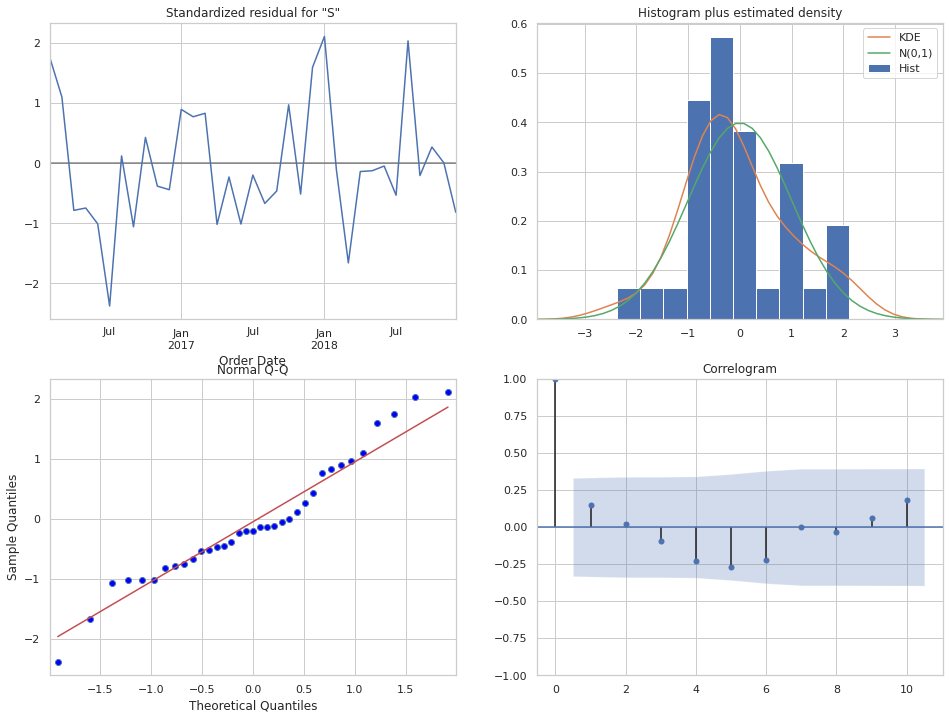

In [ ]:
best_model.plot_diagnostics(figsize=(16, 12))
plt.show()

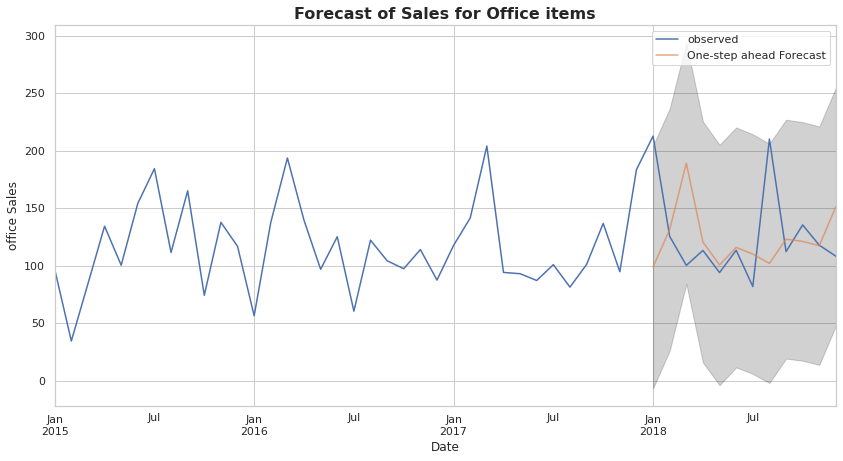

In [ ]:
pred = best_model.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = office_mean['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.title('Forecast of Sales for Office items', fontsize=16, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('office Sales')
plt.legend()

plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = office_mean['2018-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 2969.77
The Root Mean Squared Error of our forecasts is 54.5


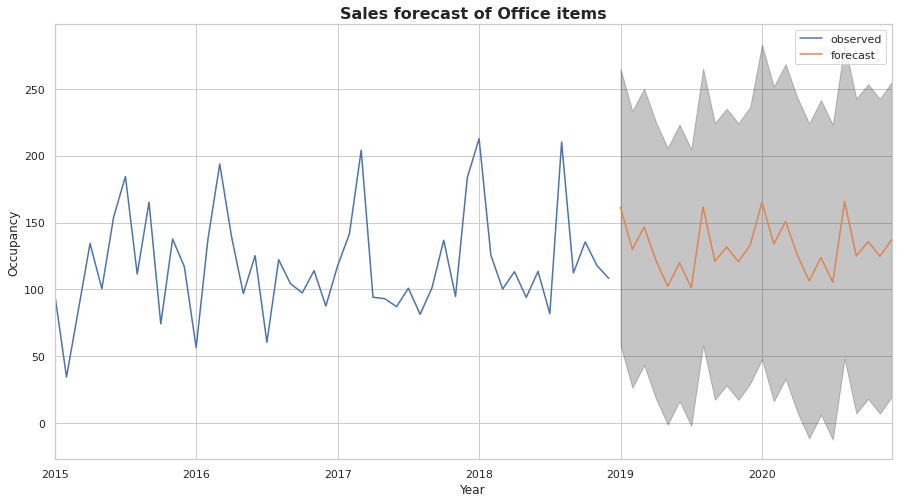

In [ ]:
# Get forecast 24 steps ahead in future
pred_uc = best_model.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = office_mean.plot(label='observed', figsize=(15, 8))

pred_uc.predicted_mean.plot(ax=ax, label='forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.title('Sales forecast of Office items', fontsize=16, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Occupancy')

plt.legend()
plt.show()

*   Technology

In [ ]:
train_technology = technology_mean.loc['2015-01-03':'2016-12-30']
test_technology = technology_mean.loc['2017-01-01':]

In [ ]:
model = pm.auto_arima(train_technology, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, 
                      m=12,             
                      d=None,          
                      seasonal=True,  
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary().tables[1])

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=322.632, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=325.122, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=353.303, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=324.629, Time=0.07 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=324.608, Time=0.03 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=326.608, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=323.238, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=323.033, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=325.209, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 0.923 seconds
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
int

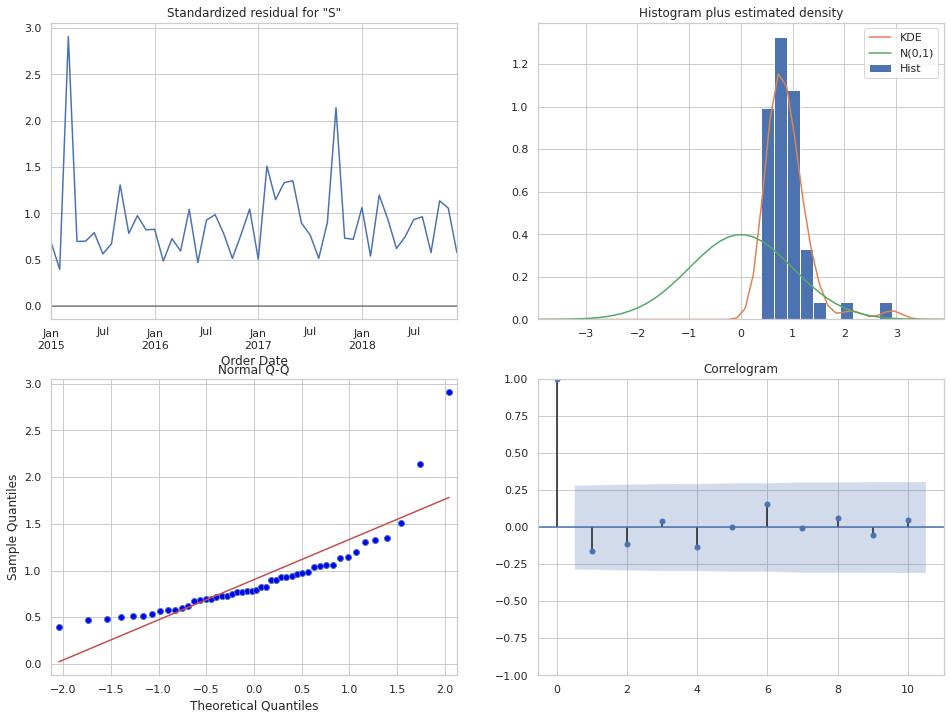

In [ ]:
model_technology = SARIMAX(technology_mean,order=(0,0,0),seasonal_order=(0,0,0,12),enforce_invertibility=False)
result_technology = model_technology.fit()
result_technology.plot_diagnostics(figsize=(16,12))
plt.show()

With lowest AIC score.

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
simple_pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))]

print('Parameter combinations for Seasonal ARIMA...')

for param in simple_pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(technology_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)


            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Parameter combinations for Seasonal ARIMA...
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:721.5688506163442
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1743.1801442325761
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:506.0787430128274
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:322.98754525212894
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:514.1576203103062
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1081.1358521773316
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:337.72306528701387
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:324.3265655019595
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:683.3203705205636
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2738.6424029768796
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:494.6399962665548
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:305.7104828501578
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:514.2823881454706
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2732.2617383250326
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:336.0872353360355
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:306.6135534235238
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:668.3045721205369
ARIMA(0, 1, 0)

ARIMA(p,d,q)(P,D,Q)m with order (1,1,1) and seasonal order (1,1,1,12) have lowest AIC score.

In [ ]:
best_model = SARIMAX(technology_mean, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
print(best_model.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2597      0.252     -1.029      0.303      -0.754       0.235
ma.L1         -0.9989     21.700     -0.046      0.963     -43.531      41.533
ar.S.L12      -0.3489      0.329     -1.062      0.288      -0.993       0.295
ma.S.L12      -0.6468      0.793     -0.816      0.415      -2.201       0.907
sigma2      5.386e+04   1.16e+06      0.046      0.963   -2.22e+06    2.33e+06


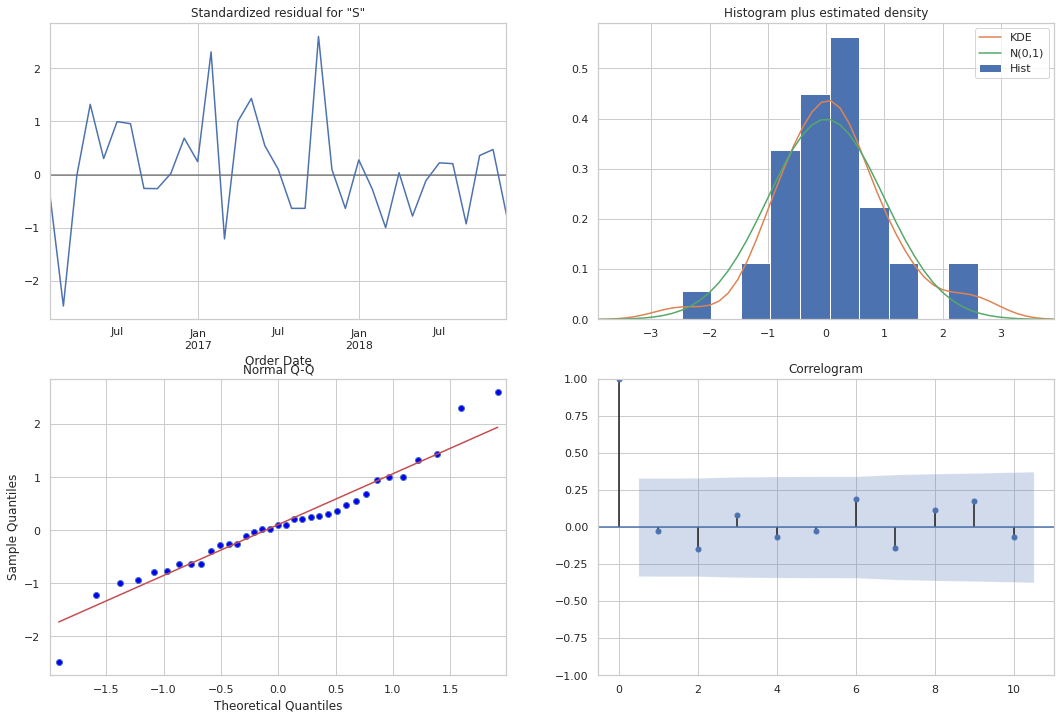

In [ ]:
best_model.plot_diagnostics(figsize=(18, 12))
plt.show()

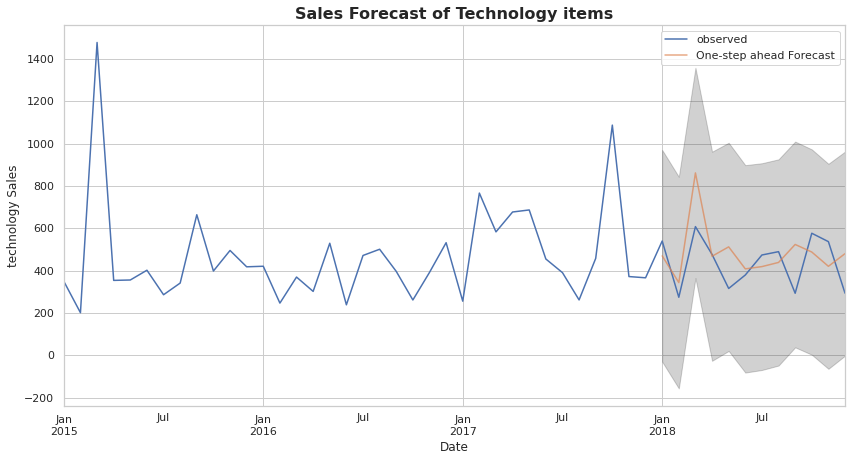

In [ ]:
pred = best_model.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = technology_mean['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.title('Sales Forecast of Technology items', fontsize=16, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('technology Sales')
plt.legend()

plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = technology_mean['2018-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 19070.01
The Root Mean Squared Error of our forecasts is 138.09


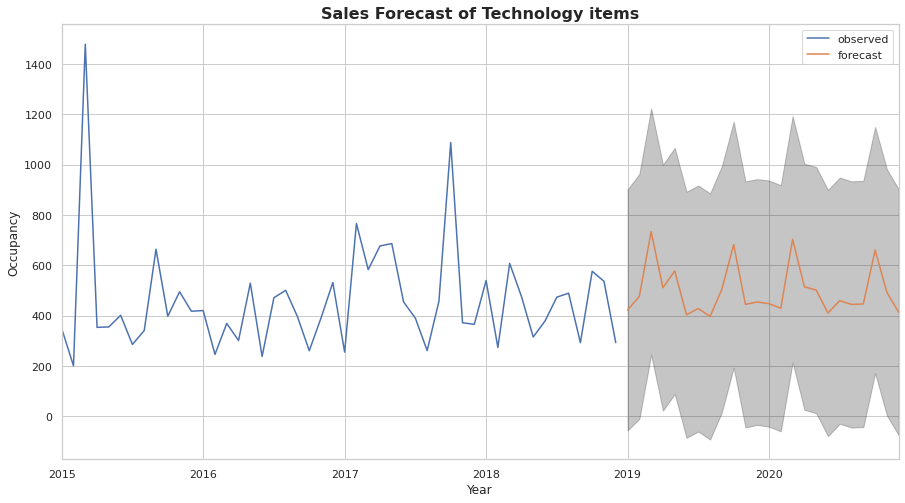

In [ ]:
# Get forecast 24 steps ahead in future
pred_uc = best_model.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = technology_mean.plot(label='observed', figsize=(15, 8))

pred_uc.predicted_mean.plot(ax=ax, label='forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.title('Sales Forecast of Technology items', fontsize=16, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Occupancy')

plt.legend()
plt.show()

Comparison of catagory

In [ ]:
furniture = pd.DataFrame({'Order Date': furniture_mean.index , 'Sales':furniture_mean.values})
furniture.head()

,Order Date,Sales
0,2015-01-01,312.126250
1,2015-02-01,262.808286
2,2015-03-01,441.635030
3,2015-04-01,305.570654
4,2015-05-01,288.032792


In [ ]:
office = pd.DataFrame({'Order Date': office_mean.index , 'Sales':office_mean.values})
office.head()

,Order Date,Sales
0,2015-01-01,97.021600
1,2015-02-01,34.571742
2,2015-03-01,84.371363
3,2015-04-01,134.398482
4,2015-05-01,100.501746


In [ ]:
technology = pd.DataFrame({'Order Date': technology_mean.index , 'Sales':technology_mean.values})
technology.head()

,Order Date,Sales
0,2015-01-01,349.254444
1,2015-02-01,201.063750
2,2015-03-01,1477.780636
3,2015-04-01,353.670538
4,2015-05-01,355.550963


In [ ]:
store = pd.merge(furniture,office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales', 'Sales_z': 'technology_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2015-01-01,312.126250,97.021600
1,2015-02-01,262.808286,34.571742
2,2015-03-01,441.635030,84.371363
3,2015-04-01,305.570654,134.398482
4,2015-05-01,288.032792,100.501746


In [ ]:
store_office_furniture_technology = technology.merge(store, how='inner', on='Order Date')
store_office_furniture_technology.rename(columns={'Sales': 'technology_sales', 'Sales_x':'furniture_sales','Sales_y':'office_sales'},inplace=True)
store_office_furniture_technology

,Order Date,technology_sales,furniture_sales,office_sales
0,2015-01-01,349.254444,312.126250,97.021600
1,2015-02-01,201.063750,262.808286,34.571742
2,2015-03-01,1477.780636,441.635030,84.371363
3,2015-04-01,353.670538,305.570654,134.398482
4,2015-05-01,355.550963,288.032792,100.501746
5,2015-06-01,401.712619,440.204187,154.202821
6,2015-07-01,285.861929,327.910636,184.404976
7,2015-08-01,341.098519,305.014437,111.563353
8,2015-09-01,663.860261,425.294300,165.200590
9,2015-10-01,397.933933,384.507719,74.341526


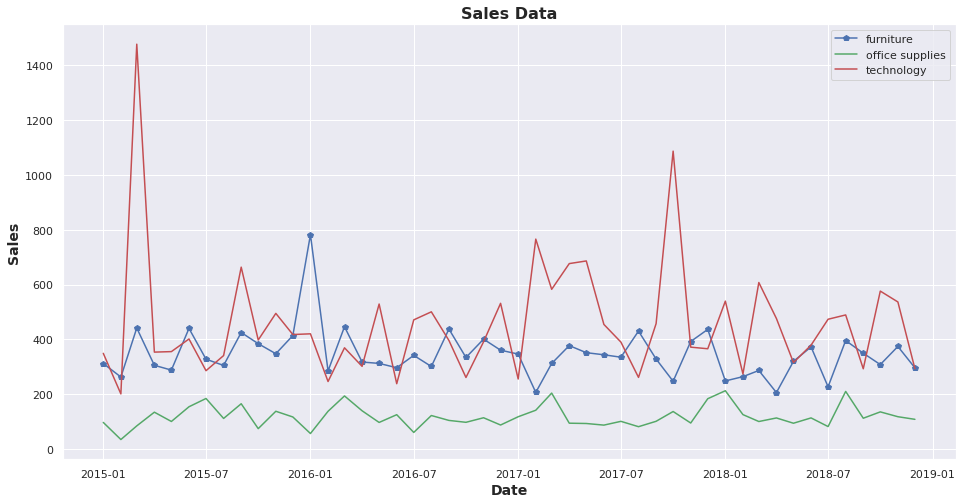

In [ ]:
sns.set(font_scale=1)
plt.figure(figsize=(16,8))
plt.plot(store_office_furniture_technology['Order Date'],store_office_furniture_technology['furniture_sales'],'p-',label='furniture')
plt.plot(store_office_furniture_technology['Order Date'],store_office_furniture_technology['office_sales'],'g-',label='office supplies')
plt.plot(store_office_furniture_technology['Order Date'],store_office_furniture_technology['technology_sales'],'r-', label='technology')
plt.xlabel('Date',fontsize=14,fontweight='bold')
plt.ylabel('Sales', fontsize = 14,fontweight='bold')
plt.title('Sales Data', fontsize=16, fontweight='bold')
plt.legend()
plt.show()

## Forecasting using Fbprophet library


1.  Furniture



In [ ]:
y_furniture_df = furniture_mean.to_frame()
y_furniture_df['ds'] = y_furniture_df.index
y_furniture_df.columns = ['y','ds']
y_furniture_df

,y,ds
Order Date,,
2015-01-01,312.126250,2015-01-01
2015-02-01,262.808286,2015-02-01
2015-03-01,441.635030,2015-03-01
2015-04-01,305.570654,2015-04-01
2015-05-01,288.032792,2015-05-01
2015-06-01,440.204187,2015-06-01
2015-07-01,327.910636,2015-07-01
2015-08-01,305.014437,2015-08-01
2015-09-01,425.294300,2015-09-01


In [ ]:
m_furniture = Prophet()

m_furniture.fit(y_furniture_df)

future_furniture = m_furniture.make_future_dataframe(periods=24,freq='MS')

future_furniture

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5v5l9sfj/tudcggem.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5v5l9sfj/jj7eyzqi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29637', 'data', 'file=/tmp/tmp5v5l9sfj/tudcggem.json', 'init=/tmp/tmp5v5l9sfj/jj7eyzqi.json', 'output', 'file=/tmp/tmp5v5l9sfj/prophet_modelijbtgipc/prophet_model-20221006180139.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:01:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:01:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01
...,...
67,2020-08-01
68,2020-09-01
69,2020-10-01
70,2020-11-01


In [ ]:
forecast_furniture = m_furniture.predict(future_furniture)
forecast_furniture

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,396.306774,419.728002,577.746194,396.306774,396.306774,100.853032,100.853032,100.853032,100.853032,100.853032,100.853032,0.0,0.0,0.0,497.159806
1,2015-02-01,394.931966,202.156752,348.316019,394.931966,394.931966,-121.012253,-121.012253,-121.012253,-121.012253,-121.012253,-121.012253,0.0,0.0,0.0,273.919713
2,2015-03-01,393.690205,273.575262,439.035896,393.690205,393.690205,-34.608741,-34.608741,-34.608741,-34.608741,-34.608741,-34.608741,0.0,0.0,0.0,359.081464
3,2015-04-01,392.315397,200.293614,359.292628,392.315397,392.315397,-108.723699,-108.723699,-108.723699,-108.723699,-108.723699,-108.723699,0.0,0.0,0.0,283.591699
4,2015-05-01,390.984939,249.841917,406.096597,390.984939,390.984939,-61.931373,-61.931373,-61.931373,-61.931373,-61.931373,-61.931373,0.0,0.0,0.0,329.053566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2020-08-01,305.838284,219.782464,375.090483,305.836270,305.840474,-5.702604,-5.702604,-5.702604,-5.702604,-5.702604,-5.702604,0.0,0.0,0.0,300.135680
68,2020-09-01,304.462708,258.467169,408.128172,304.460550,304.465088,33.340914,33.340914,33.340914,33.340914,33.340914,33.340914,0.0,0.0,0.0,337.803621
69,2020-10-01,303.131505,169.334758,325.544714,303.129206,303.134088,-53.591320,-53.591320,-53.591320,-53.591320,-53.591320,-53.591320,0.0,0.0,0.0,249.540185
70,2020-11-01,301.755929,308.612447,460.719986,301.753457,301.758689,80.543122,80.543122,80.543122,80.543122,80.543122,80.543122,0.0,0.0,0.0,382.299050


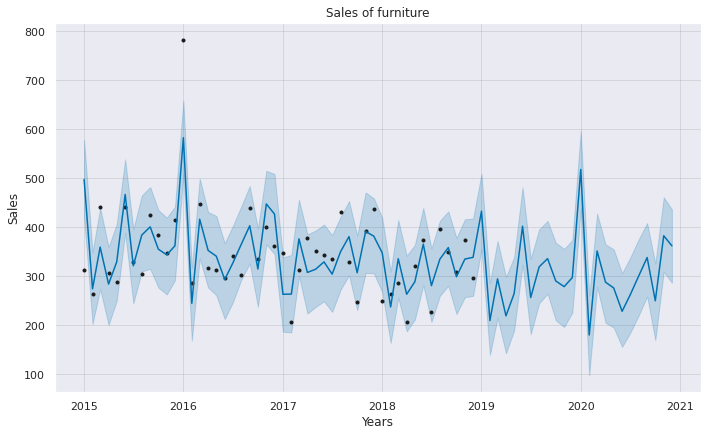

In [ ]:
m_furniture.plot(forecast_furniture);
plt.title('Sales of furniture')
plt.xlabel('Years')
plt.ylabel('Sales');

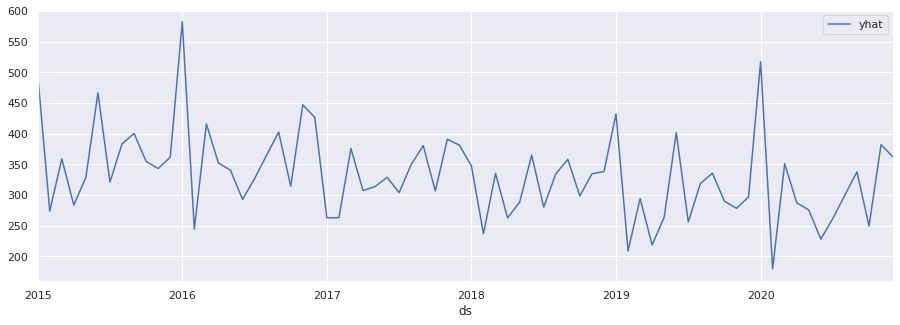

In [ ]:
plot_plotly(m_furniture, forecast_furniture)
forecast_furniture.plot(x='ds',y='yhat',figsize=(15.33,5))

plot_components_plotly(m_furniture , forecast_furniture)


2.   Office Supplies



In [ ]:
y_office_df = office_mean.to_frame()
y_office_df['ds'] = y_office_df.index
y_office_df.columns = ['y','ds']
y_office_df

,y,ds
Order Date,,
2015-01-01,97.021600,2015-01-01
2015-02-01,34.571742,2015-02-01
2015-03-01,84.371363,2015-03-01
2015-04-01,134.398482,2015-04-01
2015-05-01,100.501746,2015-05-01
2015-06-01,154.202821,2015-06-01
2015-07-01,184.404976,2015-07-01
2015-08-01,111.563353,2015-08-01
2015-09-01,165.200590,2015-09-01


In [ ]:
m_office = Prophet()

m_office.fit(y_office_df)

future_office = m_office.make_future_dataframe(periods=24,freq='MS')

future_office

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5v5l9sfj/qxg11ura.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5v5l9sfj/949d9qvy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53836', 'data', 'file=/tmp/tmp5v5l9sfj/qxg11ura.json', 'init=/tmp/tmp5v5l9sfj/949d9qvy.json', 'output', 'file=/tmp/tmp5v5l9sfj/prophet_model0vlcs78w/prophet_model-20221006180142.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:01:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:01:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01
...,...
67,2020-08-01
68,2020-09-01
69,2020-10-01
70,2020-11-01


In [ ]:
forecast_office = m_office.predict(future_office)
forecast_office

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,119.284938,64.123554,152.486756,119.284938,119.284938,-9.954956,-9.954956,-9.954956,-9.954956,-9.954956,-9.954956,0.0,0.0,0.0,109.329983
1,2015-02-01,119.665939,69.109562,152.255610,119.665939,119.665939,-8.988430,-8.988430,-8.988430,-8.988430,-8.988430,-8.988430,0.0,0.0,0.0,110.677509
2,2015-03-01,120.010068,60.854969,147.797921,120.010068,120.010068,-14.814614,-14.814614,-14.814614,-14.814614,-14.814614,-14.814614,0.0,0.0,0.0,105.195454
3,2015-04-01,120.391069,84.769832,171.754891,120.391069,120.391069,7.675652,7.675652,7.675652,7.675652,7.675652,7.675652,0.0,0.0,0.0,128.066721
4,2015-05-01,120.759779,45.089353,130.694808,120.759779,120.759779,-32.614197,-32.614197,-32.614197,-32.614197,-32.614197,-32.614197,0.0,0.0,0.0,88.145581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2020-08-01,144.344932,121.069144,203.663587,144.344929,144.344935,18.368083,18.368083,18.368083,18.368083,18.368083,18.368083,0.0,0.0,0.0,162.713016
68,2020-09-01,144.725932,89.092944,174.342246,144.725929,144.725936,-10.555695,-10.555695,-10.555695,-10.555695,-10.555695,-10.555695,0.0,0.0,0.0,134.170238
69,2020-10-01,145.094643,107.045949,194.704591,145.094639,145.094646,7.524329,7.524329,7.524329,7.524329,7.524329,7.524329,0.0,0.0,0.0,152.618972
70,2020-11-01,145.475643,76.776957,159.490981,145.475639,145.475647,-27.711459,-27.711459,-27.711459,-27.711459,-27.711459,-27.711459,0.0,0.0,0.0,117.764184


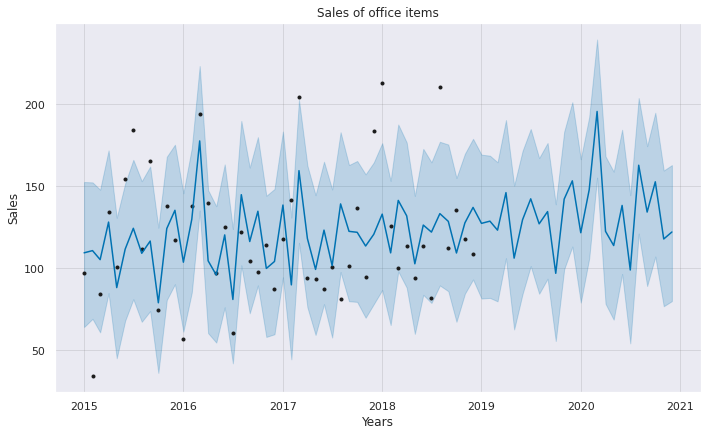

In [ ]:
m_office.plot(forecast_office)
plt.title('Sales of office items')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

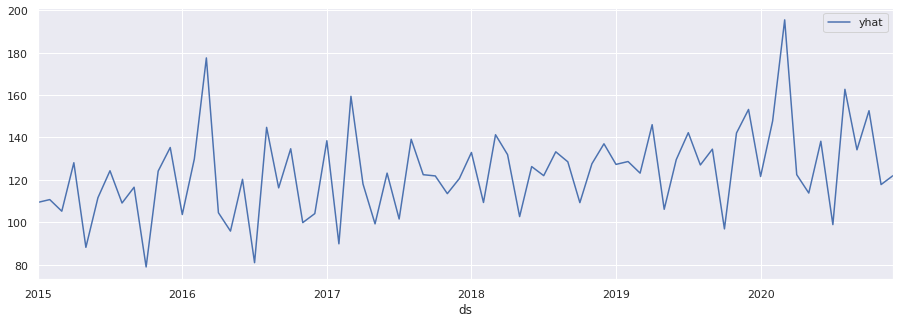

In [ ]:
plot_plotly(m_office, forecast_office)
forecast_office.plot(x='ds',y='yhat',figsize=(15.33,5))
plot_components_plotly(m_office, forecast_office)



3.   Technology



In [ ]:
y_technology_df = technology_mean.to_frame()
y_technology_df['ds'] = y_technology_df.index
y_technology_df.columns = ['y','ds']
y_technology_df

,y,ds
Order Date,,
2015-01-01,349.254444,2015-01-01
2015-02-01,201.063750,2015-02-01
2015-03-01,1477.780636,2015-03-01
2015-04-01,353.670538,2015-04-01
2015-05-01,355.550963,2015-05-01
2015-06-01,401.712619,2015-06-01
2015-07-01,285.861929,2015-07-01
2015-08-01,341.098519,2015-08-01
2015-09-01,663.860261,2015-09-01


In [ ]:
m_technology = Prophet()

m_technology.fit(y_technology_df)

future_technology = m_technology.make_future_dataframe(periods=24,freq='MS')

future_technology

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5v5l9sfj/sccq197o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5v5l9sfj/koicvnp7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63297', 'data', 'file=/tmp/tmp5v5l9sfj/sccq197o.json', 'init=/tmp/tmp5v5l9sfj/koicvnp7.json', 'output', 'file=/tmp/tmp5v5l9sfj/prophet_model_rcbyr4q/prophet_model-20221006180548.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:05:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:05:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01
...,...
67,2020-08-01
68,2020-09-01
69,2020-10-01
70,2020-11-01


In [ ]:
forecast_technology = m_technology.predict(future_technology)
forecast_technology

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,354.979164,220.766451,570.419440,354.979164,354.979164,45.806289,45.806289,45.806289,45.806289,45.806289,45.806289,0.0,0.0,0.0,400.785454
1,2015-02-01,354.544003,91.609559,457.211465,354.544003,354.544003,-78.579107,-78.579107,-78.579107,-78.579107,-78.579107,-78.579107,0.0,0.0,0.0,275.964895
2,2015-03-01,354.150954,1019.732981,1385.546356,354.150954,354.150954,856.469710,856.469710,856.469710,856.469710,856.469710,856.469710,0.0,0.0,0.0,1210.620664
3,2015-04-01,353.715792,229.920280,588.127255,353.715792,353.715792,51.979927,51.979927,51.979927,51.979927,51.979927,51.979927,0.0,0.0,0.0,405.695719
4,2015-05-01,353.294668,124.792007,501.142219,353.294668,353.294668,-38.356778,-38.356778,-38.356778,-38.356778,-38.356778,-38.356778,0.0,0.0,0.0,314.937890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2020-08-01,326.355575,236.371582,591.454084,326.355469,326.355670,79.058083,79.058083,79.058083,79.058083,79.058083,79.058083,0.0,0.0,0.0,405.413658
68,2020-09-01,325.920382,141.734404,510.029373,325.920270,325.920487,-5.168669,-5.168669,-5.168669,-5.168669,-5.168669,-5.168669,0.0,0.0,0.0,320.751714
69,2020-10-01,325.499228,383.386184,749.605676,325.499106,325.499339,240.996430,240.996430,240.996430,240.996430,240.996430,240.996430,0.0,0.0,0.0,566.495658
70,2020-11-01,325.064036,177.593080,554.679346,325.063906,325.064155,40.056951,40.056951,40.056951,40.056951,40.056951,40.056951,0.0,0.0,0.0,365.120987


Text(46.375, 0.5, 'Sales')

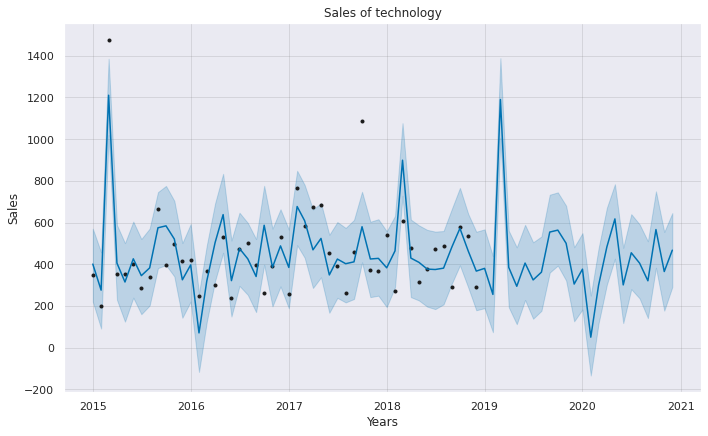

In [ ]:
m_technology.plot(forecast_technology);
plt.title('Sales of technology')
plt.xlabel('Years')
plt.ylabel('Sales')

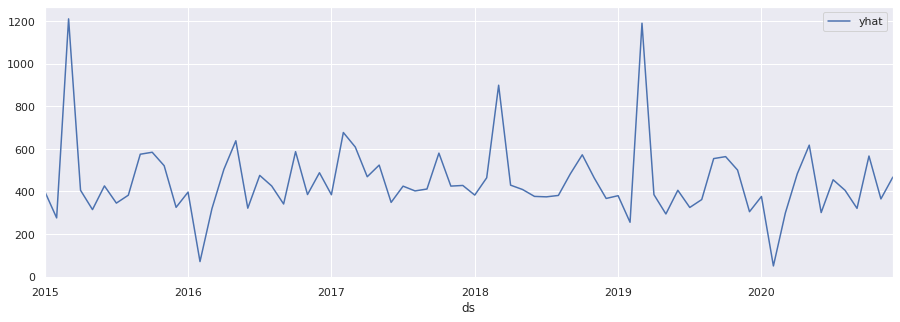

In [ ]:
plot_plotly(m_technology, forecast_technology)
forecast_technology.plot(x='ds',y='yhat',figsize=(15.2,5))
plot_components_plotly(m_technology, forecast_technology)